In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


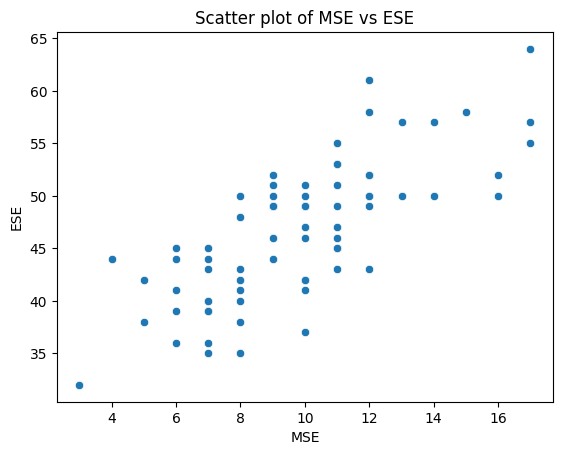

In [13]:
X= df['MSE']
Y=df['ESE']
# Scatter plot
sns.scatterplot(x=X, y=Y)
plt.xlabel('MSE')
plt.ylabel('ESE')
plt.title('Scatter plot of MSE vs ESE')
plt.show()

In [14]:
beta0 = 0
beta1 = 0
alpha = 0.01
count = 10000
n = float(len(X))

In [15]:
# Compute mean of Y
Ybar = np.mean(Y)
print("Mean of Y:", Ybar)

Mean of Y: 46.63013698630137


In [16]:
alpha

0.01

The code segment implements the iterative process of gradient descent algorithm. This code segment calculates the partial derivative of the error function. It minimizes the error function to calculate the values of beta0 and beta1.

In [17]:
for i in range(count): 
    Ybar = beta1*X + beta0    
    beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
    
print(beta0,beta1)

30.66113097444092 1.6326392534114609


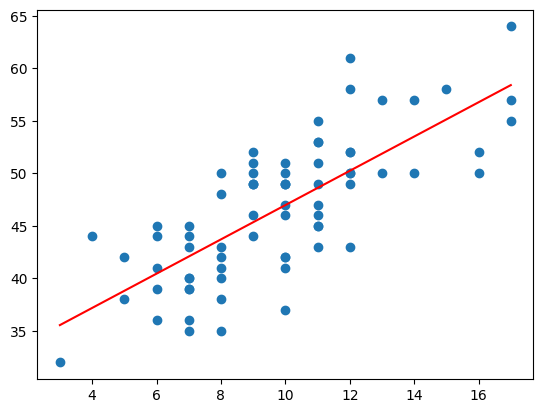

In [18]:
Ybar = beta1*X + beta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')  # regression line
plt.show()

In [19]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(df['ESE'],Ybar)
print(rse)

4.3962248281750655


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

In [24]:
x = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)
 

lr = LinearRegression()
lr.fit(x,y)


print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y,yp)

print(rse)

 


[[1.63215164]]
[30.66635246]
4.396224549647786
